<a href="https://colab.research.google.com/github/jingyi0936/PyEMD-Example/blob/main/eemd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EEMD Analysis Example 
[PyEMD](https://pyemd.readthedocs.io/en/latest/) : documentation of PyEMD
    
 *超链接是PyEMD的索引*

In [ ]:
pip install EMD-signal

In [3]:
from PyEMD import EEMD
import numpy as np
import pandas as pd
import pylab as plt

## Define s reprenting signal and t representing time

In [24]:
# Define signal 定义信号
s = pd.read_csv('data.csv') # csv file should have only one column
# You can choose header to be T/F
# s is now stored in a Pandas Dataframe
s = s.to_numpy() # convert the data frame to a numpy array
s = np.concatenate(s) # concatenate s to ensure the shape of s and t being the same

In [26]:
t = np.linspace(0, 1, len(s)) # length of s and t should be the same

## Execute EEMD on signal
执行EEMD算法




In [ ]:
# Assign EEMD to `eemd` variable
eemd = EEMD()

# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection="parabol"

# Execute EEMD on S
eIMFs = eemd.eemd(s, t, max_imf = 6)
nIMFs = eIMFs.shape[0]

In [ ]:
# Get the shape of IMF calculated
eIMFs.shape

(6, 219)

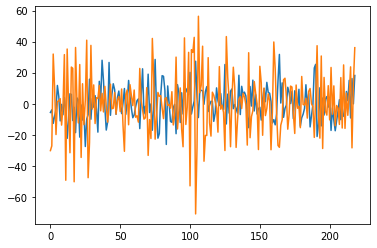

In [ ]:
rt = eemd.get_imfs_and_residue()[1]
imf = eemd.get_imfs_and_residue()[0]
plt.plot(rt)
plt.plot(imf[0])

## Extract IMF and Plot Results
提取IMF


1.   IMF1 + IMF2 + IMF3 + IMF4 + IMF5
2.   IMF1 + IMF2 + IMF3 + IMF4
3.   Summary Figure




In [ ]:
data = pd.DataFrame({'Column1': eIMFs[0, :], 'Column2': eIMFs[1, :], 'Column3': eIMFs[2, :],
                     'Column4': eIMFs[3, :], 'Column5': eIMFs[4, :], 'Column6': eIMFs[5, :]})

### IMF1 + IMF2 +IMF3 + IMF4 + IMF5
Column 2 + Column 3 + Column 4 + Column 5 + Column 6

In [ ]:
new = data['Column2'] + data['Column3'] + data['Column4'] + data['Column5'] + data['Column6']

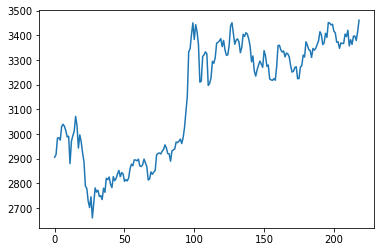

In [ ]:
plt.plot(s) # original signal

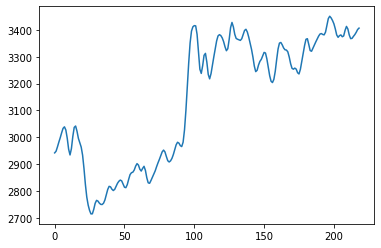

In [ ]:
plt.plot(new) # new signal combined of IMF1 + IMF2 + IMF3 + IMF4, IMF1 is ignored

### IMF1 + IMF2 + IMF3 + IMF4
Column 2 + Column 3 + Column 4 + Column 5

In [ ]:
new1 = data['Column2'] + data['Column3'] + data['Column4'] + data['Column5'] 

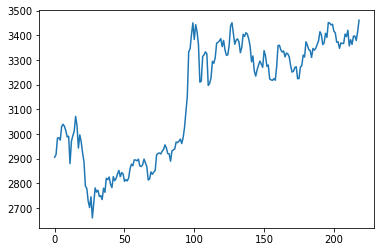

In [ ]:
plt.plot(s) # original signal

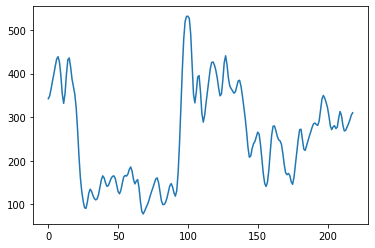

In [ ]:
plt.plot(new1)

### Plots of Each IMF in one figure

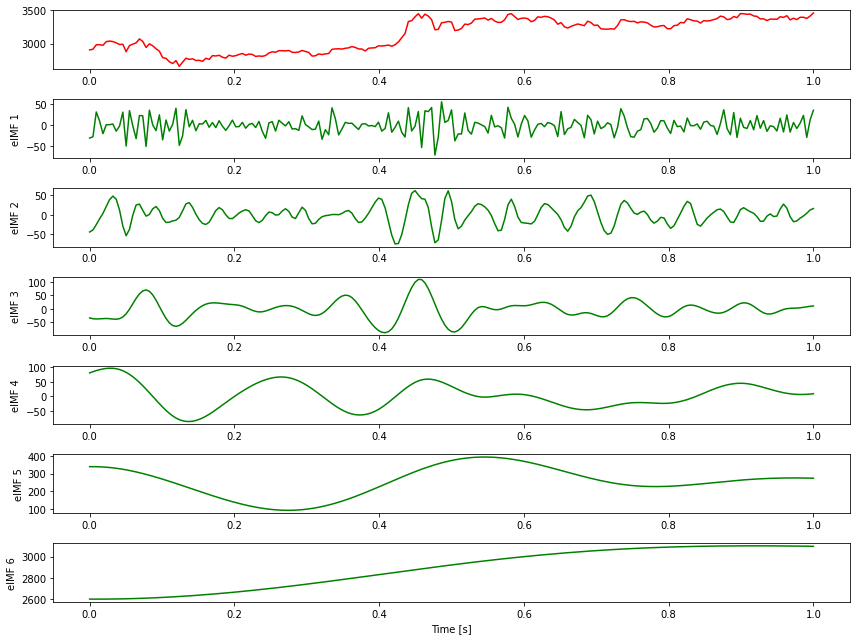

In [ ]:
# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, s, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)
plt.show()

## Iteration
We only use the first 100 numbers of the original signal. For each iteration, we use 30 numbers, such as using 0th to 29th, etc.


In [61]:
s = s[0:100] # extract first 100 numbers
ans = [None] * 70 # defines the vector which will save R
for i in range(70):
  ss = s[i:(i + 30)] # each iteration, we use 30 numbers
  t = np.linspace(0, 1, len(ss))
  # Assign EEMD to `eemd` variable
  eemd = EEMD()

  # Say we want detect extrema using parabolic method
  emd = eemd.EMD
  emd.extrema_detection="parabol"

  # Execute EEMD on S
  eIMFs = eemd.eemd(ss, t, max_imf = 6)
  nIMFs = eIMFs.shape[0]

  rt = eemd.get_imfs_and_residue()[1]
  imf = eemd.get_imfs_and_residue()[0][nIMFs - 1] # get the last imf
  
  std_imf = np.std(imf)
  ans[i] = np.log(np.std(ss - imf) / std_imf) # save to the vector 


(array([ 5.,  4., 15.,  9., 13.,  7., 10.,  5.,  1.,  1.]),
 array([-0.52162568,  0.01287533,  0.54737634,  1.08187736,  1.61637837,
         2.15087938,  2.68538039,  3.21988141,  3.75438242,  4.28888343,
         4.82338445]),
 <a list of 10 Patch objects>)

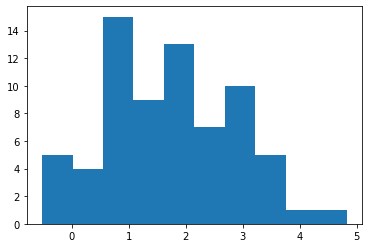

In [64]:
plt.hist(ans)

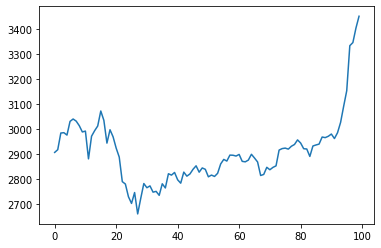

In [56]:
plt.plot(s) # Notice s is a signal whose length is 100